In [1]:
# Import libraries 
import pandas as pd 
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

In [2]:
# Reading train data set
df = pd.read_csv('~/Downloads/predice-el-futuro/train_csv.csv', parse_dates= True) 
# Reading train data set
df.head() 

,id,time,feature
0,0,2019-03-19 00:00:00,237.97
1,1,2019-03-19 00:00:10,57.93
2,2,2019-03-19 00:00:20,90.53
3,3,2019-03-19 00:00:30,260.75
4,4,2019-03-19 00:00:40,49.70


In [3]:
df.dtypes

id           int64
time        object
feature    float64
dtype: object

In [4]:
# Reading test data set

test = pd.read_csv('~/Downloads/predice-el-futuro/test_csv.csv', parse_dates = True) 

test.head() 

,id,time
0,80,2019-03-19 00:13:20
1,81,2019-03-19 00:13:30
2,82,2019-03-19 00:13:40
3,83,2019-03-19 00:13:50
4,84,2019-03-19 00:14:00


In [5]:
test.dtypes

id       int64
time    object
dtype: object

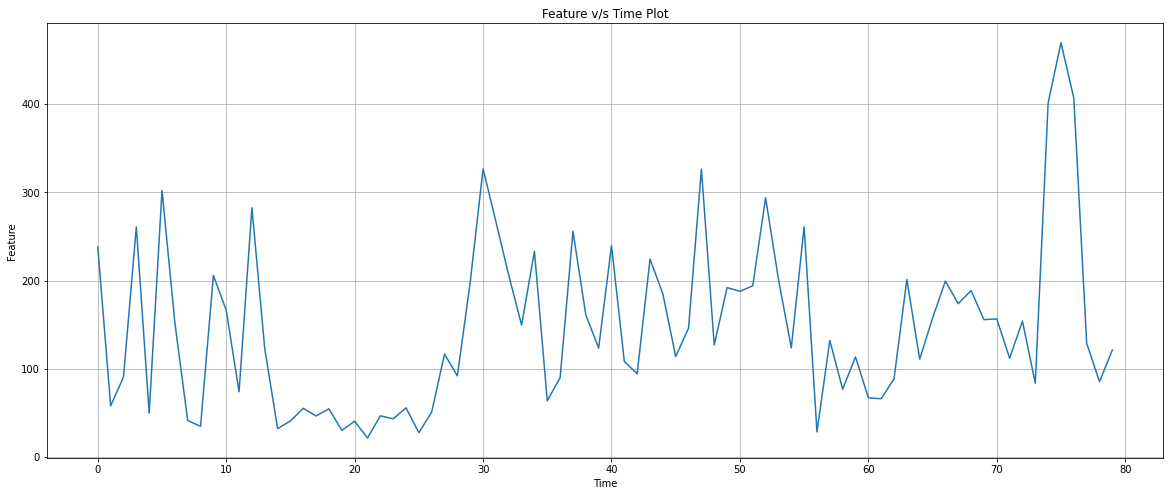

In [6]:
# Visual Stationarity test

plt.figure(figsize=(20,8))
plt.plot(df.index, df['feature'])
plt.title('Feature v/s Time Plot')
plt.xlabel('Time')
plt.ylabel('Feature')
plt.grid(True)
plt.show()

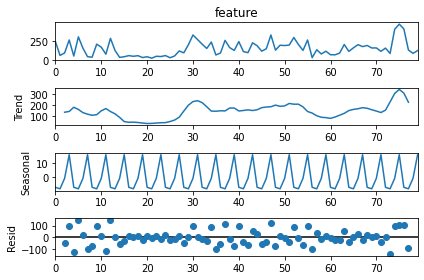

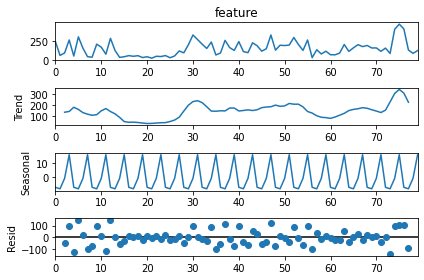

In [7]:
# Seasonal Decomposition 
from statsmodels.tsa.seasonal import seasonal_decompose

#result = seasonal_decompose(train.feature, model ='multiplicative') 
decompPred = seasonal_decompose(df.feature, model="additive", freq=4)

# ETS plot 
decompPred.plot()

In [8]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller
test_result=adfuller(df['feature'])

In [9]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(feature):
    result=adfuller(feature)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [10]:
adfuller_test(df['feature'])

ADF Test Statistic : -5.945866499650216
p-value : 2.205049473411699e-07
#Lags Used : 0
Number of Observations Used : 79
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [11]:
#Auto Regressive Model

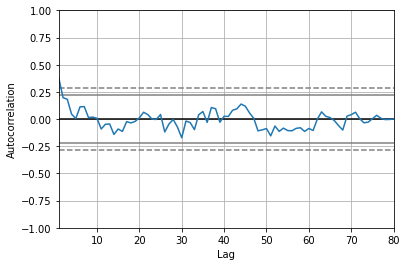

In [12]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['feature'])
plt.show()

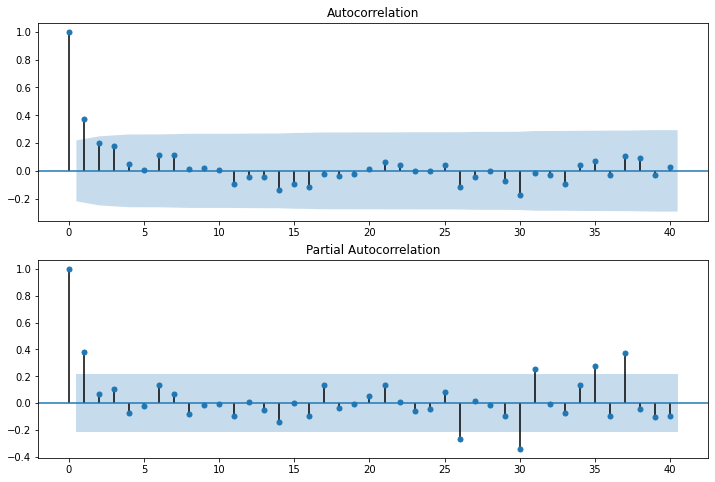

In [13]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['feature'],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['feature'],lags=40,ax=ax2)

In [14]:
#SARIMAX Model

model = sm.tsa.statespace.SARIMAX(df['feature'],
                                order=(1, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = model.fit()

print(results.summary().tables[1])



                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4032      0.125      3.218      0.001       0.158       0.649
ma.L1         -1.0000      0.200     -4.998      0.000      -1.392      -0.608
ma.S.L12      -0.6355      0.239     -2.661      0.008      -1.104      -0.167
sigma2      1.091e+04   1.83e-05   5.95e+08      0.000    1.09e+04    1.09e+04


In [15]:
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                            feature   No. Observations:                   80
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -323.970
Date:                            Fri, 12 Jun 2020   AIC                            655.940
Time:                                    13:48:11   BIC                            663.822
Sample:                                         0   HQIC                           658.971
                                             - 80                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4032      0.125      3.218      0.001       0.158       0.649
ma.L1         -1.0000      0.200     -4.998      0.000      -1.392      -0.608
ma.S.L12      -0.6355      0.239     -2.661      0.008      -1.104      -0.167
sigma2      1.091e+04   1.83e-05   5.95e+08      0.000    1.09e+04    1.09e+04
===================================================================================
Ljung-Box (Q):                       27.73   Jarque-Bera (JB):                 2.67
Prob(Q):                              0.93   Prob(JB):                         0.26
Heteroskedasticity (H):               0.89   Skew:                             0.55
Prob(H) (two-sided):                  0.81   Kurtosis:                         2.92
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.37e+24. Standard errors may be unstable.
"""

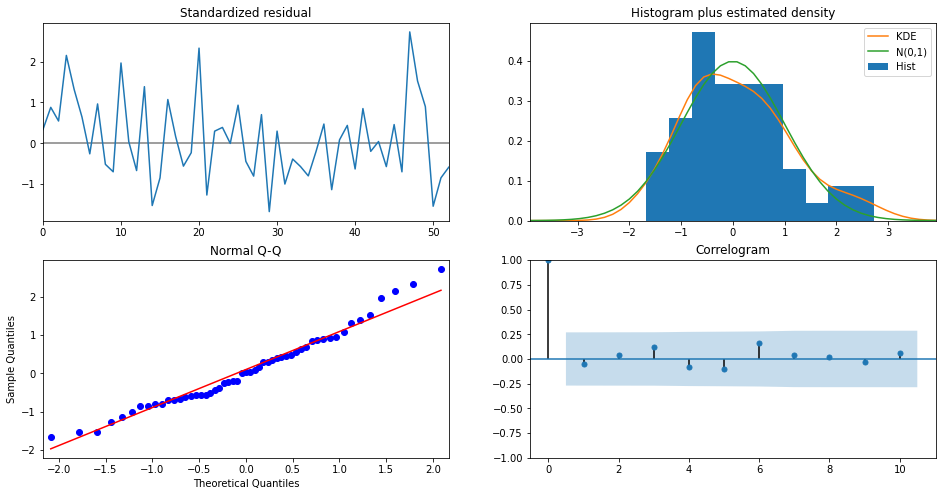

In [16]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

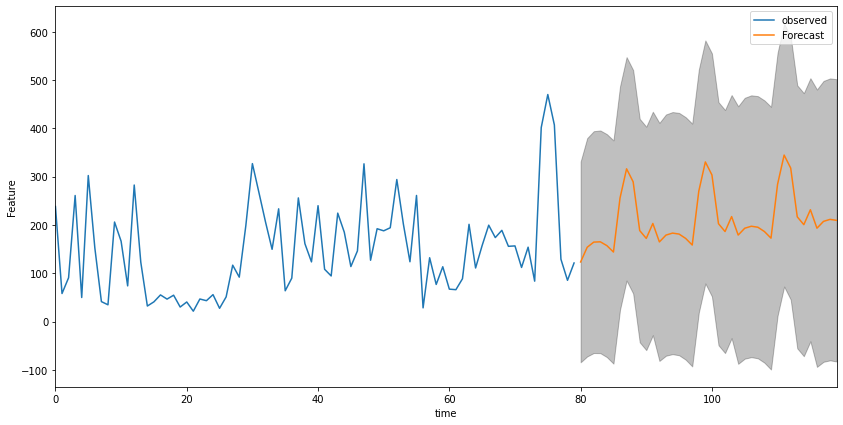

In [17]:
pred_uc = results.get_forecast(steps=40)
pred_ci = pred_uc.conf_int()

ax = df['feature'].plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('time')
ax.set_ylabel('Feature')

plt.legend()
plt.show()

In [18]:
pred_uc.predicted_mean

80     123.262260
81     153.652305
82     164.341354
83     164.946407
84     157.037080
85     143.829857
86     255.458691
87     316.004875
88     289.162273
89     188.206709
90     171.997675
91     202.927760
92     164.722403
93     178.844547
94     182.974483
95     180.934943
96     171.959333
97     158.322192
98     269.777685
99     330.253981
100    303.383199
101    202.416273
102    186.202658
103    217.130897
104    178.924794
105    193.046638
106    197.176453
107    195.136865
108    186.161235
109    172.524086
110    283.979576
111    344.455870
112    317.585088
113    216.618162
114    200.404547
115    231.332786
116    193.126683
117    207.248527
118    211.378342
119    209.338753
dtype: float64

In [19]:
ytest= pd.DataFrame(pred_uc.predicted_mean)

In [20]:
ytest = ytest.reset_index(drop=True)

In [21]:
ytest

,0
0,123.262260
1,153.652305
2,164.341354
3,164.946407
4,157.037080
5,143.829857
6,255.458691
7,316.004875
8,289.162273
9,188.206709


In [22]:
test['time']= pd.to_datetime(test['time']) 
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 2 columns):
id      40 non-null int64
time    40 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(1)
memory usage: 768.0 bytes


In [23]:
test_pred = pd.concat([test, ytest], axis=1)

In [24]:
test_pred

,id,time,0
0,80,2019-03-19 00:13:20,123.262260
1,81,2019-03-19 00:13:30,153.652305
2,82,2019-03-19 00:13:40,164.341354
3,83,2019-03-19 00:13:50,164.946407
4,84,2019-03-19 00:14:00,157.037080
5,85,2019-03-19 00:14:10,143.829857
6,86,2019-03-19 00:14:20,255.458691
7,87,2019-03-19 00:14:30,316.004875
8,88,2019-03-19 00:14:40,289.162273
9,89,2019-03-19 00:14:50,188.206709


In [25]:
test_pred['feature']=test_pred[0]

In [26]:
test_pred

,id,time,0,feature
0,80,2019-03-19 00:13:20,123.262260,123.262260
1,81,2019-03-19 00:13:30,153.652305,153.652305
2,82,2019-03-19 00:13:40,164.341354,164.341354
3,83,2019-03-19 00:13:50,164.946407,164.946407
4,84,2019-03-19 00:14:00,157.037080,157.037080
5,85,2019-03-19 00:14:10,143.829857,143.829857
6,86,2019-03-19 00:14:20,255.458691,255.458691
7,87,2019-03-19 00:14:30,316.004875,316.004875
8,88,2019-03-19 00:14:40,289.162273,289.162273
9,89,2019-03-19 00:14:50,188.206709,188.206709


In [27]:
test_pred=test_pred.drop(columns=[0],axis=1)

In [ ]:
test_pred